In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 4.3MB 42.3MB/s 
     |████████████████████████████████| 501kB 43.4MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test)= imdb.load_data(num_words = 20000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [0]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [0]:
X_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

In [0]:
X_train.shape, X_test.shape

((25000, 100), (25000, 100))

In [0]:
vocab_size = 20000
embed_size = 128

### Build LSTM

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding#Advance version of word to text
# Create dense vectors of fixed size

In [0]:
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim=embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=120, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 120)               119520    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 121       
Total params: 2,679,641
Trainable params: 2,679,641
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 106s 4ms/sample - loss: 0.4198 - accuracy: 0.8034 - val_loss: 0.3444 - val_accuracy: 0.8508
Epoch 2/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.2357 - accuracy: 0.9094 - val_loss: 0.3559 - val_accuracy: 0.8486
Epoch 3/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.1559 - accuracy: 0.9420 - val_loss: 0.4727 - val_accuracy: 0.8337
Epoch 4/5
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.0992 - accuracy: 0.9657 - val_loss: 0.4927 - val_accuracy: 0.8326
Epoch 5/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.0643 - accuracy: 0.9778 - val_loss: 0.6185 - val_accuracy: 0.8259


In [0]:
history.history

{'accuracy': [0.8034, 0.9094, 0.94204, 0.96572, 0.97776],
 'loss': [0.4197953120136261,
  0.23568197051525117,
  0.15586764435768127,
  0.09924764499187469,
  0.06427536245048046],
 'val_accuracy': [0.8508, 0.84864, 0.83372, 0.83256, 0.82592],
 'val_loss': [0.34441974165916445,
  0.35591038764953614,
  0.47267856773376465,
  0.4927455149841309,
  0.6185347082901]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

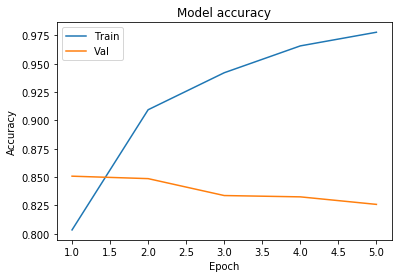

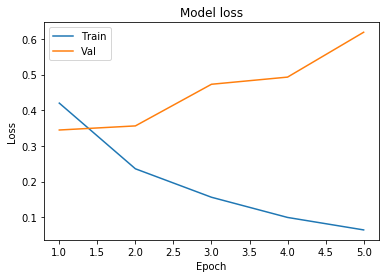

In [0]:
plot_learningCurve(history, 5)